<img src="http://www.cs.wm.edu/~rml/images/wm_horizontal_single_line_full_color.png">

<h1 style="text-align:center;">CSCI 141-01, Fall 2023, course notes</h1>
<h1 style="text-align:center;">More about booleans and truth testing</h1>

# Contents

* [The secret life of booleans](#secret_life)
* [More about truth testing](#more_truth)
* [Testing objects for truthiness](#truthiness)
* [Another gotcha 🐞](#gotcha)
* [The <code>and</code> &amp; <code>or</code> operators return one of their operands](#return)
* [I am the walrus: assignment expressions 🤯](#walrus)
* [Exercises](#exercises)

# The secret life of  booleans <a id="secret_life"/>

You should think of <code class="kw">True</code> and <code class="kw">False</code> as being logical variables, but they are actually closely related to the integers 1 and 0:

In [ ]:
if True == 1:
    print('True == 1')
    
if True == 2:
    print('True == 2')
else:
    print('True != 2')

if False == 0:
    print('False == 0')

Let's try converting booleans to integers and see what happens:

In [ ]:
print(int(True))
print(int(False))

However, <code class="kw">True</code> and <code class="kw">False</code> are not aliases for 1 and 0:

In [ ]:
if True is 1:
    print('True is 1')
else:
    print('True is not 1')

if False is 0:
    print('False is 0')
else:
    print('False is not 0')

You can even do things like this, **though you generally should not**:

In [ ]:
print(3.14 * True)
print(True + True)
print(True + False)
print(3.14 * False)
print(42 * True)

# More about truth testing <a id="more_truth"/>

Python allows for more general truth testing than we have seen.

We'll start with some examples and then unpack what's going on.  In the following code, the value 3.14 is converted to a boolean because it is controlling the <code class="kw">if</code> statement:

In [ ]:
if 3.14:
    print('boo!')

In [ ]:
x = 3.14
if not x:
    print('boo!')

The preceding two cells suggest that in the context of an <code class="keyword">if</code> statement the value 3.14 acts like the boolean value <code class="keyword">True</code>!  We can confirm this by using an explicit conversion to boolean:

In [ ]:
print(bool(3.14))

But wait &ndash; there's more!  Check this out:

In [ ]:
n = 0
if n:
    print('boo!')

In [ ]:
if not n:
    print('boo!')

In [ ]:
if 0.0:
    print('boo!')

In [ ]:
if not 0.0:
    print('boo!')

The preceding four cells suggest that in the context of an <code class="keyword">if</code> statement, the values 0 and 0.0 act like <code class="keyword">False</code>!  Again, let's look at an explicit conversion to boolean:

In [ ]:
print(bool(0))

What about a string?

In [ ]:
if '':
    print('boo!')

In [ ]:
if not '':
    print('If life hands you lemons, make lemonade!')
    
if ' ':
    print('If life hands you lemons, make lemonade!')

In [ ]:
s = 'possum'
if s:
    print('If life hands you possums, make possum-ade!')
else:
    print('If life hands you possums, you better have gloves on - them critters will bite!')

Now it looks like the empty string behaves like <code class="kw">False</code>, while a non-empty string acts like <code class="kw">True</code>!

<b>What is going on?!</b>

# Testing objects for truthiness <a id="truthiness">

Here are the rules, per the [Python documentation](https://docs.python.org/3/library/stdtypes.html#truth-value-testing).  These rules are simliar to those seen in other languages like C and C++.

Any object can be tested for a truth value for use in an <code class="kw">if</code> or <code class="kw">while</code> statement or as operand of a boolean operation. 

The following values are considered to be 
<code class="kw">False</code>:
* False;
* zero of any numeric type (integer, float, complex), e.g., 0, 0.0, 0j;
* an empty string.

In addition, there are other values we will see later that are considered to be <code class="kw">False</code>:
* any empty sequence, for example, '', (), [];
* any empty mapping, for example, {};
* instances of a user-defined class that defines a __bool__() or __len__() method, when that method returns the integer zero or boolean value <code class="kw">False</code>;
* the special entity <code class="kw">None</code>.

<b>All other values are considered true.</b>

Operations and built-in functions that have a boolean result always return 
* 0 or <code class="kw">False</code> for false, and
* 1 or <code class="kw">True</code> for true, 
unless otherwise stated. 

Exception: the Boolean operations <code class="kw">or</code> and <code class="kw">and</code> always return one of their operands.

In [ ]:
x = 42
y = 54
pi = 3.14
if (x < y) and pi:  # x < y is True and pi is nonzero, hence True
    print('boo!')

In [ ]:
x = 42
y = 54
if x - y:  # x-y = -12 != 0, so x-y evaluates to True
    print('boo!')

Observe that in the preceding example,
<pre>
if x - y:
    print('boo!')
</pre>
is equivalent to 
<pre>
if x != y:
    print('boo!')
</pre>
However, the latter is clearer (which may not be what you want).

# Another gotcha 🐞 <a id="gotcha">

This is another place where using <code class="kw">is</code> and <code>==</code> for booleans can cause trouble. Consider the following code, which relies on the fact that any nonzero number is treated as <code class="kw">True</code>:

In [ ]:
def foo(x):
    return x**2

x = 4
if foo(x):
    print('boo!')

Now suppose we used an unnecessary (but dangerous) <code class="kw">is</code> statement:

In [ ]:
def foo(x):
    return x**2

x = 4
if foo(x) is True:
    print('boo!')

Because 4<sup>2</sup> = 16 is not the boolean <code class="kw">True</code>, the print statement is not executed.

We see similar behavior is we use <code>==</code> to test for truth:

In [ ]:
def foo(x):
    return x**2

x = 4
if foo(x) == True:
    print('boo!')

Take care when using <code class="kw">is</code>, <code>== True</code>, or <code>== False</code> to test truthfulness.

# The <code>and</code> &amp; <code>or</code> operators return one of their operands <a id="return"></a>

Here is an illustration of the rule that the Boolean operations <code class="kw">or</code> and <code class="kw">and</code> always return one of their operands.

In [ ]:
boo = (0.0 or 3.14)
print(boo)

In [ ]:
boo = (1.0 or 3.14)
print(boo)

In [ ]:
boo = (1.0 and 3.14)
print(boo)

In [ ]:
boo = (0.0 or 0)
print(boo)

In [ ]:
boo = (0.0 or 0 or 3.14)
print(boo)

These examples reveal that Python returns the value it is processing when it first realizes the truth or falsehood of the statement.

For instance, in 
```python
boo = (0.0 or 3.14),
```
it is not until we encounter 3.14 that we know whether the <code class="kw">or</code>
statement is true.

On the other hand, in
```python
boo = (1.0 or 3.14),
```
we know the <code class="kw">or</code> statement is true the moment we encounter the 1.0.  We do not need to look any further.

Again, if you use <code class="kw">is</code> or <code>==</code> to test for truthfulness you'll get into trouble:

In [ ]:
boo = (0.0 or 3.14)
if boo is True:
    print('boo!')
if boo == True:
    print('boo!')    

As soon as Python determines the truth or falsehood of a statement it stops the evaluation of the boolean.  We can use this feature.  For instance, in the following code we know that the square root will be computed **only** if the number is non-negative:

In [ ]:
from math import sqrt

x = -1
if (x >= 0) and (sqrt(x) <= 1.7):
    print(x)

If we reverse the order in the boolean expression we get into trouble because we attempt to compute $\sqrt{-1}$:

In [ ]:
x = -1
if (sqrt(x) <= 1.7) and (x >= 0):
    print(x)

# I am the walrus: assignment expressions 🤯  <a id="walrus"/>

Python 3.8 introduced **assignment expressions**, a.k.a. **the walrus**.  This is an idiom that is very common in the C programming language.

Assignment expressions are indicated by <code>:=</code> (whence the nickname ["walrus"](https://www.nationalgeographic.com/animals/photos/walruses/).  Let's look at an example.

Here is some standard code:

In [ ]:
def f(s):
    # Do something computationally expensive...
    return len(s)

s = "walrus"

if f(s) > 4:
    n = f(s) + 42
    print(n)

This involves two calls to <code>f()</code>, which is inefficient if <code>f()</code> is expensive.  We can avoid the second call if we rewrite the code as 

In [ ]:
def f(s):
    # Do something computationally expensive...
    return len(s)

s = "walrus"
y = f(s)

if y > 4:
    n = y + 42
    print(n)

This comes at the expense of a new line of code and a new variable.

Using an assignment expression we can avoid the second function call while keeping the code succinct as follows:

In [ ]:
def f(s):
    # Do something computationally expensive...
    return len(s)

s = "walrus"

if (y := f(s)) > 4:  # <- here is the assignment expression.
    n = y + 42
    print(n)

The assignment expression is <code>(y := f(s))</code>.  It
1. evaluates <code>f(s)</code>,
2. sets <code>y = f(s)</code>, and
3. evaluates the boolean <code>y > 4</code>,
all in a single statement.

The walrus operator <code>:=</code> should be read as meaning "becomes"; i.e., <code>y</code> becomes <code>f(s)</code>.

An assignment expression
* <b>must</b> use the walrus operator <code>:=</code> and 
* <b>must</b> be enclosed in parentheses.  

Assignment expressions are one of the few places in Python where parentheses matter crucially.

If you fail to use the walrus, you'll get a syntax error:

In [ ]:
def f(s):
    # Do something computationally expensive...
    return len(s)

s = "walrus"

if (y = f(s)) > 4:  # <- here is the assignment expression.
    n = y + 42
    print(n)

If you omit the parentheses, you get an insidious bug 😱:

In [ ]:
def f(s):
    # Do something computationally expensive...
    return len(s)

s = "walrus"

if y := f(s) > 4:  # <- here is the assignment expression.
    n = y + 42
    print(y)
    print(n)

Without the parentheses <code>y</code> ends up with the boolean value <code>f(s) > 4</code>, which is then treated as 1 in the sum!!!

<div class="danger"></div>
Don't forget the parentheses in an assignment expression!! 😱

Assignment expressions were enormously controversial and the acrimony led to Guido van Rossum stepping down from his role of Python's Benevolent Dictator for Life (BDFL).  Referring to the Python Enhancement Proposal (PEP) that led to assignment expressions, [van Rossum said](https://www.mail-archive.com/python-committers@python.org/msg05628.html)
<blockquote>
Now that PEP 572 is done, I don't ever want to have to fight so hard for a PEP and find that so many people despise my decisions.
</blockquote>
You have perhaps already noticed in life that seemingly minor things excite great passions in some people.  Computer language features are no exception. 
<blockquote>
Opinions have caused more ills than the plague or earthquakes on this little globe of ours. <br/>
&ndash; Voltaire, Letter to Élie Bertrand (Jan 5, 1759)
</blockquote>    

# Exercises <a id="exercises"/>

<div class="exercise">
<b>Exercise.</b>    
What will be printed by the following:
<code>
def f(x):
    return [x]
def g(x, y):
    return x*y
def h(x):
    if x > 0:
        return x**2
if f(0):
    print('marco')
if g(-1, 2):
    print('polo')
if g(1, 0):
    print('foo')
if h(3):
    print('bar')
if h(0):
    print('foobar')
</code>
</div>

<b>Answer.</b>
<div class="voila">
We will see
<pre>
marco
polo
bar
</pre>
    The value <code>g(1, 0)</code> is 0 so it is treated as <code>False</code>.  The value <code>h(0)</code> is <code>None</code> which is also treated as <code>False</code>.  The other function values are non-zero and treated as <code>True</code>.
</div>

<div class="exercise">
<b>Exercise.</b>    
In the example
<pre>
boo = (0.0 or 0)
</pre>   
why is the result 0 rather than 0.0?
</div>

In [ ]:
boo = (0.0 or 0)
print(boo)

<b>Answer.</b>
<div class="voila">
Because this is an <code>or</code> statement, it's not until we reach the end and have seen nothing but zeros that we can conclude the statement is false.  Because Python concludes the falsehood of the statement when it reaches the <code>0</code>, that is the value that is returned.
</div>

<div class="exercise">
<b>Exercise.</b>    
This was taken from a student's code.  The following tests whether a word contains all of the vowels a, e, i, o, u.  What will happen if <code>word</code> is "aardvark"?
<pre>
# Testing for the presence of all the vowels in a word.
if 'a' or 'A' in word:
    if 'e' or 'E' in word:
        if 'i' or 'I' in word:
            if 'o' or 'O' in word:
                if 'u' or 'U' in word:
                    print(word)
</pre>                    
</div>

<b>Answer.</b>
<div class="voila">
    This <b>always</b> prints <code>word</code>!  This is because
<pre>
    if 'a' or 'A' in word
</pre>
is interpreted as
<pre>
    if 'a' or ('A' in word)
</pre>    
which is always true because the value is <code>'a'</code> (because of Python's rules for values returned by <code>or</code>).
    
This is a twofer &ndash; the <code>or</code> doesn't do what is desired here, and the lack of parentheses adds to the mischief.
</div>

<h4>This notebook is brought to you by red panda triplets:</h4>

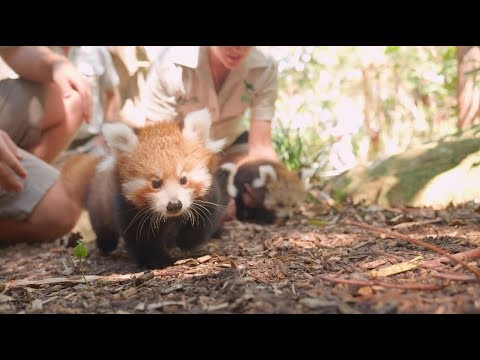

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('TTUhu9db5bM')